In [1]:
import os, re
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk

from string import digits, punctuation

from keras.preprocessing.text import Tokenizer 
from nltk.tokenize.casual import reduce_lengthening
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# Open and save data

train = pd.read_csv('data/train.csv/train.csv')

train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test = pd.read_csv('data/test.csv/test.csv')

test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
len(train)

159571

In [5]:
len(test)

153164

In [6]:
# control of null elements

train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [7]:
train.isna().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [8]:
test.isnull().any()

id              False
comment_text    False
dtype: bool

In [9]:
test.isna().any()

id              False
comment_text    False
dtype: bool

In [10]:
x_tr = train['comment_text']

In [11]:
x_ts = test['comment_text']

In [12]:
y_tr_0 = train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0)
              & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]

In [13]:
len(y_tr_0)

143346

In [14]:
y_labeled = len(train) - len(y_tr_0)

y_labeled

16225

In [15]:
perc_lab = (y_labeled*100)/len(train) # percentuale di commenti etichettati all'interno del training dataset 

perc_lab

10.167887648758233

In [16]:
# lunghezza media dei commenti 

lenght_comments = x_tr.apply(lambda x: len(x))

In [17]:
max(lenght_comments)

5000

In [18]:
min(lenght_comments)

6

In [19]:
lenght_comments.mean()

394.0732213246768

In [20]:
lenght_comments.std()

590.7202819048919

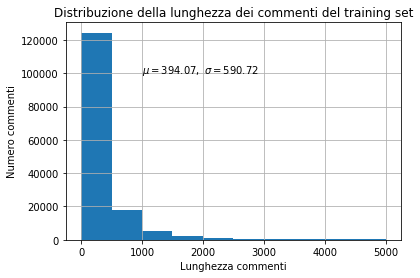

In [32]:
plt.xlabel('Lunghezza commenti')
plt.ylabel('Numero commenti')
plt.title('Distribuzione della lunghezza dei commenti del training set')
plt.text(1000, 100000, r'$\mu=394.07,\ \sigma=590.72$')
lenght_comments.hist()

In [33]:
lenght_comments = x_ts.apply(lambda x: len(x))

In [34]:
lenght_comments.mean()

364.8751207855632

In [35]:
lenght_comments.std()

592.4920987302779

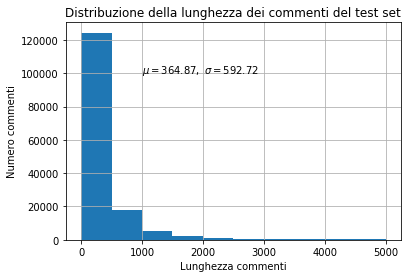

In [36]:
plt.xlabel('Lunghezza commenti')
plt.ylabel('Numero commenti')
plt.title('Distribuzione della lunghezza dei commenti del test set')
plt.text(1000, 100000, r'$\mu=364.87,\ \sigma=592.72$')
lenght_comments.hist()

In [25]:
max(lenght_comments)

5000

In [26]:
min(lenght_comments)

1

# Text normalization: x_1 -> without punctuation and digits

In [16]:
# removing punctuation

x_tr_1 = x_tr.str.translate(str.maketrans(' ', ' ', punctuation))
x_ts_1 = x_ts.str.translate(str.maketrans(' ', ' ', punctuation))

In [17]:
x_tr_1[:2]

0    Explanation\nWhy the edits made under my usern...
1    Daww He matches this background colour Im seem...
Name: comment_text, dtype: object

In [18]:
#removing digits

x_tr_1 = x_tr_1.str.translate(str.maketrans(' ', ' ', digits))
x_ts_1 = x_ts_1.str.translate(str.maketrans(' ', ' ', digits))

In [19]:
x_tr_1[:5]

0    Explanation\nWhy the edits made under my usern...
1    Daww He matches this background colour Im seem...
2    Hey man Im really not trying to edit war Its j...
3    \nMore\nI cant make any real suggestions on im...
4    You sir are my hero Any chance you remember wh...
Name: comment_text, dtype: object

# Tokenization

In [20]:
max_features = 30000

tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(list(x_tr_1))

In [21]:
x_tr_tokenized = tokenizer.texts_to_sequences(x_tr_1)
x_ts_tokenized = tokenizer.texts_to_sequences(x_ts_1)

In [22]:
# pad sequences: every sample with the same length

max_len = 200
X_tr_1 = pad_sequences(x_tr_tokenized, maxlen=max_len)
X_ts_1 = pad_sequences(x_ts_tokenized, maxlen=max_len)

In [42]:
X_tr_1[200:205]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   159,     2, 14052,     7,   565,     5,    10,
           13,    23,   125,     1,   282, 14052,   512,   180,   257,
           63,   512,     2,    16,  2239,    35,     4,     8,   602,
          529,     9,     7,    32,   488,     9,     7,    73, 17916,
      

# Text normalization: x_2 -> without URLs, abbreviations, stop words

In [23]:
# removing abbreviation, tag and urls

abbr = [ # list of english abbreviation, tag, urls and astericks words
    (r'(W|w)on\'t', r'will not'),
    (r'(C|c)an\'t', r'can not'),
    (r'(I|i)\'m', r'i am'),
    (r'(A|a)in\'t', r'is not'),
    (r'(\w+)\'ll', r'\g<1> will'),
    (r'(\w+)n\'t', r'\g<1> not'),
    (r'(\w+)\'ve', r'\g<1> have'),
    (r'(\w+)\'s', r'\g<1> is'),
    (r'(\w+)\'re', r'\g<1> are'),
    (r'(\w+)\'d', r'\g<1> would'),
    (r'(\w*|\W*)\n(\w*|\W*)', r'\g<1> \g<2>'),
    (r'(\w*|\W*)\t(\w*|\W*)', r'\g<1> \g<2>'),
    (r'http\S+', r' '),
    (r'www\S+', r' '),
    (r'mother\*\*\*\*ers', r'motherfuckers'), 
    (r'motherf\*cking', r'motherfucking'), 
    (r'mother\*\*\*\*er', r'motherfucker'), 
    (r'motherf\*cker', r'motherfucker'), 
    (r'bullsh\*t', r'bullshit'), 
    (r'f\*\*cking', r'fucking'), 
    (r'f\*ucking', r'fucking'), 
    (r'fu\*cking', r'fucking'), 
    (r'\*\*\*\*ing', r'fucking'), 
    (r'a\*\*hole', r'asshole'), 
    (r'assh\*le', r'asshole'), 
    (r'f\*\*\*\*\*\*', r'fucking'), 
    (r'f\*\*\*\*\*g', r'fucking'), 
    (r'f\*\*\*ing', r'fucking'), 
    (r'f\*\*king', r'fucking'), 
    (r'f\*cking', r'fucking'), 
    (r'fu\*\*ing', r'fucking'), 
    (r'fu\*king', r'fucking'), 
    (r'fuc\*ers', r'fuckers'), 
    (r'f\*\*\*\*\*', r'fucking'), 
    (r'f\*\*\*ed', r'fucked'), 
    (r'f\*\*ker', r'fucker'), 
    (r'f\*cked', r'fucked'), 
    (r'f\*cker', r'fucker'), 
    (r'f\*ckin', r'fucking'), 
    (r'fu\*ker', r'fucker'), 
    (r'fuc\*\*n', r'fucking'), 
    (r'ni\*\*as', r'niggas'), 
    (r'b\*\*ch', r'bitch'), 
    (r'b\*tch', r'bitch'), 
    (r'c\*unt', r'cunt'), 
    (r'f\*\*ks', r'fucks'), 
    (r'f\*ing', r'fucking'), 
    (r'ni\*\*a', r'nigga'), 
    (r'c\*ck', r'cock'), 
    (r'c\*nt', r'cunt'), 
    (r'cr\*p', r'crap'), 
    (r'd\*ck', r'dick'), 
    (r'f\*\*\*', r'fuck'), 
    (r'f\*\*k', r'fuck'), 
    (r'f\*ck', r'fuck'), 
    (r'fc\*k', r'fuck'), 
    (r'fu\*\*', r'fuck'), 
    (r'fu\*k', r'fuck'), 
    (r's\*\*\*', r'shit'), 
    (r's\*\*t', r'shit'), 
    (r'sh\*\*', r'shit'), 
    (r'sh\*t', r'shit'), 
    (r'tw\*t', r'twat') 
] # list of atericks words from https://www.kaggle.com/tunguz/bi-gru-lstm-dual-embedding-new-test-cleaned-5

In [24]:
def clean_comment(comment):
    """
    Questa funzione normalizza i commenti 
    
    
    comment: a string
    """
    
    for (pattern, repl) in patterns:
        
        comment = re.sub(pattern, repl, comment)
        
    return comment

In [25]:
patterns = [(re.compile(regex), repl) for (regex, repl) in abbr]

In [26]:
x_tr_abbr = x_tr.apply(lambda x :clean_comment(x))
x_ts_abbr = x_ts.apply(lambda x :clean_comment(x))

In [27]:
x_tr_abbr[:5]

0    Explanation Why the edits made under my userna...
1    D'aww! He matches this background colour i am ...
2    Hey man, i am really not trying to edit war. I...
3    " More I can not make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [28]:
# everything in lowercase

x_tr_clean = x_tr_abbr.apply(lambda x: x.lower())
x_ts_clean = x_ts_abbr.apply(lambda x: x.lower())

In [29]:
x_tr_clean[:5]

0    explanation why the edits made under my userna...
1    d'aww! he matches this background colour i am ...
2    hey man, i am really not trying to edit war. i...
3    " more i can not make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

In [37]:
# removing stop words

list_sw = list(stopwords.words('english'))

In [38]:
len(list_sw)

179

In [31]:
x_tr_clean = x_tr_clean.apply(lambda x: ' '.join([w for w in x.split() if w not in (list_sw)]))
x_ts_clean = x_ts_clean.apply(lambda x: ' '.join([w for w in x.split() if w not in (list_sw)]))

In [32]:
selezione celle con dato valore pandasx_tr_clean[:5]

0    explanation edits made username hardcore metal...
1    d'aww! matches background colour seemingly stu...
2    hey man, really trying edit war. guy constantl...
3    " make real suggestions improvement - wondered...
4             you, sir, hero. chance remember page on?
Name: comment_text, dtype: object

In [33]:
# reduce repeat character sequences of length 3 or greater

x_tr_clean = x_tr_clean.apply(lambda x: reduce_lengthening(x))
x_ts_clean = x_ts_clean.apply(lambda x: reduce_lengthening(x))

In [34]:
# removing digits and punctuation
x_tr_clean = x_tr_clean.str.translate(str.maketrans(' ', ' ', punctuation))
x_ts_clean = x_ts_clean.str.translate(str.maketrans(' ', ' ', punctuation))
x_tr_clean = x_tr_clean.str.translate(str.maketrans(' ', ' ', digits))
x_ts_clean = x_ts_clean.str.translate(str.maketrans(' ', ' ', digits))

In [35]:
x_tr_clean[:5]

0    explanation edits made username hardcore metal...
1    daww matches background colour seemingly stuck...
2    hey man really trying edit war guy constantly ...
3     make real suggestions improvement  wondered s...
4                 you sir hero chance remember page on
Name: comment_text, dtype: object

In [36]:
x_tr_tokenized = tokenizer.texts_to_sequences(x_tr_clean)
x_ts_tokenized = tokenizer.texts_to_sequences(x_ts_clean)

In [37]:
# pad sequences: every sample with the same length

X_tr_2 = pad_sequences(x_tr_tokenized, maxlen=max_len)
X_ts_2 = pad_sequences(x_ts_tokenized, maxlen=max_len)

In [41]:
X_tr_2[200:205]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

# Lemmatization 

In [54]:
lemmatizer = WordNetLemmatizer()

In [55]:
x_tr_tok = x_tr_abbr.apply(lambda x: word_tokenize(x))

In [56]:
x_ts_tok = x_ts_abbr.apply(lambda x: word_tokenize(x))

In [57]:
x_tr_tok[:5]

0    [Explanation, Why, the, edits, made, under, my...
1    [D'aww, !, He, matches, this, background, colo...
2    [Hey, man, ,, i, am, really, not, trying, to, ...
3    [``, More, I, can, not, make, any, real, sugge...
4    [You, ,, sir, ,, are, my, hero, ., Any, chance...
Name: comment_text, dtype: object

In [58]:
# everything in lowercase and removing stop words


x_tr_clean_lem = x_tr_tok.apply(lambda x: [w.lower() for w in x])
x_ts_clean_lem = x_ts_tok.apply(lambda x: [w.lower() for w in x])
x_tr_clean_lem = x_tr_clean_lem.apply(lambda x: ([w for w in x if w not in (list_sw)]))
x_ts_clean_lem = x_ts_clean_lem.apply(lambda x: ([w for w in x if w not in (list_sw)]))

In [59]:
x_tr_clean_lem[:5]

0    [explanation, edits, made, username, hardcore,...
1    [d'aww, !, matches, background, colour, seemin...
2    [hey, man, ,, really, trying, edit, war, ., gu...
3    [``, make, real, suggestions, improvement, -, ...
4      [,, sir, ,, hero, ., chance, remember, page, ?]
Name: comment_text, dtype: object

In [60]:
# removing digits and punctuation

x_tr_clean_lem = x_tr_clean_lem.apply(lambda x: ([w for w in x if w not in (punctuation)]))
x_ts_clean_lem = x_ts_clean_lem.apply(lambda x: ([w for w in x if w not in (punctuation)]))
x_tr_clean_lem = x_tr_clean_lem.apply(lambda x: ([w for w in x if w not in (digits)]))
x_ts_clean_lem = x_ts_clean_lem.apply(lambda x: ([w for w in x if w not in (digits)]))

In [61]:
x_tr_clean_lem[:5]

0    [explanation, edits, made, username, hardcore,...
1    [d'aww, matches, background, colour, seemingly...
2    [hey, man, really, trying, edit, war, guy, con...
3    [``, make, real, suggestions, improvement, won...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [62]:
def get_wordnet_pos(tag):
    """
    Questa funzione trasforma il treebank pos_tag
    nel tag Wordnet corrispondente
    
    tag: a string
    """
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [63]:
x_tr_pos = x_tr_clean_lem.apply(lambda x: nltk.pos_tag(x))

In [64]:
x_ts_pos = x_ts_clean_lem.apply(lambda x: nltk.pos_tag(x))

In [65]:
x_tr_pos[:5]

0    [(explanation, NN), (edits, NNS), (made, VBN),...
1    [(d'aww, NN), (matches, NNS), (background, IN)...
2    [(hey, NN), (man, NN), (really, RB), (trying, ...
3    [(``, ``), (make, VB), (real, JJ), (suggestion...
4    [(sir, NN), (hero, NN), (chance, NN), (remembe...
Name: comment_text, dtype: object

In [66]:
x_tr_lem = x_tr_pos.apply(lambda x: [lemmatizer.lemmatize(t[0],get_wordnet_pos(t[1])) for t in x])

In [67]:
x_ts_lem = x_ts_pos.apply(lambda x: [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in x])

In [68]:
x_tr_lem[:5]

0    [explanation, edits, make, username, hardcore,...
1    [d'aww, match, background, colour, seemingly, ...
2    [hey, man, really, try, edit, war, guy, consta...
3    [``, make, real, suggestion, improvement, wond...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [69]:
x_tr_tokenized = tokenizer.texts_to_sequences(x_tr_lem)
x_ts_tokenized = tokenizer.texts_to_sequences(x_ts_lem)

In [70]:
# pad sequences: every sample with the same length

X_tr_3 = pad_sequences(x_tr_tokenized, maxlen=max_len)
X_ts_3 = pad_sequences(x_ts_tokenized, maxlen=max_len)

# Stemming

In [71]:
ps = PorterStemmer()
ls = LancasterStemmer()

In [72]:
x_tr_stem = x_tr_tok.apply(lambda x: [ls.stem(t) for t in x])

In [73]:
x_ts_stem = x_ts_tok.apply(lambda x: [ls.stem(t) for t in x])

In [74]:
x_tr_stem[:5]

0    [expl, why, the, edit, mad, und, my, usernam, ...
1    [d'aww, !, he, match, thi, background, colo, i...
2    [hey, man, ,, i, am, real, not, try, to, edit,...
3    [``, mor, i, can, not, mak, any, real, suggest...
4    [you, ,, sir, ,, ar, my, hero, ., any, chant, ...
Name: comment_text, dtype: object

In [75]:
# everything in lowercase and removing stop words

x_tr_clean_stem = x_tr_stem.apply(lambda x: [w.lower() for w in x])
x_ts_clean_stem = x_ts_stem.apply(lambda x: [w.lower() for w in x])
x_tr_clean_stem = x_tr_clean_stem.apply(lambda x: ([w for w in x if w not in (list_sw)]))
x_ts_clean_stem = x_ts_clean_stem.apply(lambda x: ([w for w in x if w not in (list_sw)]))

In [76]:
x_tr_clean_stem[:5]

0    [expl, edit, mad, und, usernam, hardc, metalli...
1    [d'aww, !, match, thi, background, colo, seem,...
2    [hey, man, ,, real, try, edit, war, ., thi, gu...
3    [``, mor, mak, real, suggest, improv, -, wond,...
4      [,, sir, ,, ar, hero, ., chant, rememb, pag, ?]
Name: comment_text, dtype: object

In [77]:
# removing digits and punctuation

x_tr_clean_stem = x_tr_clean_stem.apply(lambda x: ([w for w in x if w not in (punctuation)]))
x_ts_clean_stem = x_ts_clean_stem.apply(lambda x: ([w for w in x if w not in (punctuation)]))
x_tr_clean_stem = x_tr_clean_stem.apply(lambda x: ([w for w in x if w not in (digits)]))
x_ts_clean_stem = x_ts_clean_stem.apply(lambda x: ([w for w in x if w not in (digits)]))

In [78]:
x_tr_clean_stem[:5]

0    [expl, edit, mad, und, usernam, hardc, metalli...
1    [d'aww, match, thi, background, colo, seem, st...
2    [hey, man, real, try, edit, war, thi, guy, con...
3    [``, mor, mak, real, suggest, improv, wond, se...
4                  [sir, ar, hero, chant, rememb, pag]
Name: comment_text, dtype: object

In [79]:
x_tr_toks = tokenizer.texts_to_sequences(x_tr_clean_stem)
x_ts_toks = tokenizer.texts_to_sequences(x_ts_clean_stem)

In [80]:
X_tr_4 = pad_sequences(x_tr_toks, maxlen=max_len)
X_ts_4 = pad_sequences(x_ts_toks, maxlen=max_len)

# GloVe

In [81]:
emb_index_glove = {}

file_glove = open('data/glove.twitter.27B/glove.6B.200d.txt')

for line in file_glove:

    l = line.split()
    word = l[0]
    coefs = np.asarray(l[1:], dtype='float32')
    emb_index_glove[word] = coefs

In [82]:
file_glove.close()

In [83]:
len(emb_index_glove)

400000

In [84]:
# for random initialization

all_embs_glove = np.stack(emb_index_glove.values())
emb_glove_mean, emb_glove_std = all_embs_glove.mean(), all_embs_glove.std()
emb_matrix_glove = np.random.normal(emb_glove_mean, emb_glove_std, (max_features,max_len))

/home/chiarapower/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [85]:
for word, i in tokenizer.word_index.items():
    
    if i>=max_features: continue
    
    emb_vector = emb_index_glove.get(word)
    
    if emb_vector is not None:
        
        emb_matrix_glove[i] = emb_vector

# FastText

In [86]:
emb_index_ft = {}

file_ft = open('dataft/fil9.vec')

for line in file_ft:

    l = line.split()
    word = l[0]
    coefs = np.asarray(l[1:], dtype='float32')
    emb_index_ft[word] = coefs


In [87]:
file_ft.close()

In [88]:
len(emb_index_ft)

218316

In [89]:
# for random initialization

all_embs_ft = np.stack(emb_index_ft.values())
emb_ft_mean, emb_ft_std = all_embs_ft.mean(), all_embs_ft.std()
emb_matrix_ft = np.random.normal(emb_ft_mean, emb_ft_std, (max_features,max_len))

In [90]:
for word, i in tokenizer.word_index.items():
    
    if i >= max_features: continue
    
    emb_vector = emb_index_ft.get(word)
    
    if emb_vector is not None:
        
        emb_matrix_ft[i] = emb_vector

In [91]:
emb_matrix_glove.shape

(30000, 200)

In [92]:
emb_matrix_ft.shape

(30000, 200)

# Save in files

In [93]:
len(X_tr_1)

159571

In [94]:
len(X_tr_2)

159571

In [95]:
len(X_tr_3)

159571

In [96]:
len(X_tr_4)

159571

In [97]:
len(X_ts_1)

153164

In [98]:
len(X_ts_2)

153164

In [99]:
len(X_ts_3)

153164

In [100]:
len(X_ts_4)

153164

In [47]:
np.savetxt("x_tr_1.csv", X_tr_1)

In [48]:
np.savetxt("x_ts_1.csv", X_ts_1)

In [103]:
np.savetxt("x_tr_2.csv", X_tr_2)

In [104]:
np.savetxt("x_ts_2.csv", X_ts_2)

In [105]:
np.savetxt("x_tr_3.csv", X_tr_3)

In [106]:
np.savetxt("x_ts_3.csv", X_ts_3)

In [107]:
np.savetxt("x_tr_4.csv", X_tr_4)

In [108]:
np.savetxt("x_ts_4.csv", X_ts_4)

In [109]:
np.savetxt("emb_matr_glove.csv", emb_matrix_glove)

In [110]:
np.savetxt("emb_matr_ft.csv", emb_matrix_ft)